#### Question 1

Posted on absalon is a press release from the European Securities and Markets Authoriy regarding its decision to prohibit sales of binary options to retail investors. Read the [article](https://www.esma.europa.eu/press-news/esma-news/esma-agrees-prohibit-binary-options-and-restrict-cfds-protect-retail-investors) and answer the following questions:

1. What is the motivation behind this decision? How does this relate to the models we have seen in class?

Answer: This decision is motivated by the complexity of fundamental pricing for some specific classes of options contracts, as well as a perceived lack of transparency over tradable news and logistical details such as margin requirements and more. This decision is backed by the fact that an estimated 74-89% of retail accounts end up in the red from taking such positions, indicating a structural tendancy towards inadequate pricing of these conracts by such investors. 
Where still tradable, these positions' leverage will further be strictly capped at set values, contingent on the underlying asset class to prevent uninformed investors from taking on unreasonable leverage due to a misunderstanding of the contract's embedded volatility. 

2. What eﬀect will this decision have on liquidity in the binary options market?

Answer: This effect will likely reduce liquidity in the binary options market by both reducing the number of contracts outstanding as well as by removing a set of market actors from the market with disproportionately high numbers of transactions. As we have seen, retail traders (as opposed to non-HFT institutional investors) tend to trade in and out of positions disproportionately, providing excess liquidity and incentivizing sophisticated parties to trade in the markets they are active in. Reducing the former's access to these products may therefore leed to a pullback in institutional trading which will affect long-term liquidity in these options markets. 

3. Measures announced in the press release diﬀer between the binary option and CFD markets. How will the eﬀects of the regulation be diﬀerent across the two markets?

Answer: The proposed ban on binary options will have more draconian effects on the market overall as they will effectively remove the entire class of retail traders from the market. This will seriously upend the balance of information between traders operating in this market, likely reducing margins long term and thus creating a secular drag on the expansion of this type of market. 
Conversely, the measures taken in the CFD market are likely to have a more limited downstream effect. Since these measures merely constrained the size of options positions/increased funding requirements for larger bets, it is fathomable that the impact on total trading volume could be limited since committed retail traders would still be given access to trading markets and the ability to transact in sufficiently large volumes. The long term effects on liquidity should thus be markedly smaller in this market. 

Be concise and to the point. Please try to keep your answer less than 100 words (but not just one sentense).

#### Question 2 Trade data 
In the following use the trade data in tqBAC.csv.  Denote trade prices by $p_t$ and mid-quotes by $m_t$.
* Sign each trade based on Lee-ready algorithm 
* Calcualte Spread, Effective Spread and Realized Spread by EXCHANGES
* Examine order correlation 

#### Import the relevant modules

In [54]:
from datetime import datetime as dt
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 


In [55]:
trade = pd.read_csv('C:/Users/simon/Downloads/tqBAC.csv')

#### Lee and Ready algorithm 
A typical classification is 
 *   buyer-initiated  if pt > mt
 *   buyer-initiated  if pt = mt and pt < pt−1 (downtick)
 *   seller-initiated if pt < mt
 *   seller-initiated if pt = mt and pt > pt−1 (uptick)

In [56]:
# trade['LeeReady'] = (trade['PRICE'] > trade['MID'])
# if (trade['PRICE'] == trade['MID']):
#     trade['LeeReady'] = (trade['PRICE'] < trade['PRICE'].shift(1)).astype(int)


trade.head()
trade['MID'] = (trade['BID'] + trade['OFR']) / 2
trade['SPREAD'] = trade['OFR'] - trade['BID']
trade['EFF_SPREAD'] = trade['PRICE'] - (trade['BID'] + trade['SPREAD'] / 2)
trade['LeeReady'] = np.where((trade['PRICE'] > trade['MID']) | ((trade['PRICE'] == trade['MID']) & (trade['PRICE'] < trade['PRICE'].shift(1))), 1, -1)
trade['REALIZED'] = (trade['LeeReady'].apply(lambda x: -1 if x < 0 else 1))*(trade['PRICE'] - trade['MID'].shift(-1))
trade.head()

,date,SYMBOL,EX,PRICE,SIZE,COND,BID,BIDSIZ,OFR,OFRSIZ,MID,SPREAD,EFF_SPREAD,LeeReady,REALIZED
0,2017-09-19T14:30:00.009Z,BAC,P,24.70,20000,,24.72,6,24.74,100,24.73,0.02,-3.000000e-02,-1,3.000000e-02
1,2017-09-19T14:30:01.361Z,BAC,T,24.71,300,,24.72,6,24.74,100,24.73,0.02,-2.000000e-02,-1,2.000000e-02
2,2017-09-19T14:30:01.525Z,BAC,P,24.70,100,,24.72,6,24.74,100,24.73,0.02,-3.000000e-02,-1,3.000000e-02
3,2017-09-19T14:30:02.990Z,BAC,N,24.73,429950,,24.72,6,24.74,100,24.73,0.02,3.552714e-15,1,3.552714e-15
4,2017-09-19T14:30:02.996Z,BAC,N,24.72,100,,24.72,35,24.74,420,24.73,0.02,-1.000000e-02,-1,5.000000e-03


In [57]:
def to_hourly_date(date_string):
    try:
        # Attempt to parse with milliseconds
        date_object = dt.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%fZ')
    except ValueError:
        # If parsing with milliseconds fails, try without milliseconds
        date_object = dt.strptime(date_string, '%Y-%m-%dT%H:%M:%SZ')
    date_hour = date_object.replace(minute=0, second=0, microsecond=0)
    return date_hour
trade['hour'] = trade['date'].apply(to_hourly_date)
trade.head()

,date,SYMBOL,EX,PRICE,SIZE,COND,BID,BIDSIZ,OFR,OFRSIZ,MID,SPREAD,EFF_SPREAD,LeeReady,REALIZED,hour
0,2017-09-19T14:30:00.009Z,BAC,P,24.70,20000,,24.72,6,24.74,100,24.73,0.02,-3.000000e-02,-1,3.000000e-02,2017-09-19 14:00:00
1,2017-09-19T14:30:01.361Z,BAC,T,24.71,300,,24.72,6,24.74,100,24.73,0.02,-2.000000e-02,-1,2.000000e-02,2017-09-19 14:00:00
2,2017-09-19T14:30:01.525Z,BAC,P,24.70,100,,24.72,6,24.74,100,24.73,0.02,-3.000000e-02,-1,3.000000e-02,2017-09-19 14:00:00
3,2017-09-19T14:30:02.990Z,BAC,N,24.73,429950,,24.72,6,24.74,100,24.73,0.02,3.552714e-15,1,3.552714e-15,2017-09-19 14:00:00
4,2017-09-19T14:30:02.996Z,BAC,N,24.72,100,,24.72,35,24.74,420,24.73,0.02,-1.000000e-02,-1,5.000000e-03,2017-09-19 14:00:00


In [58]:
exchangeTrades = {}
grouped_dfs = trade.groupby('EX')
for name, group in grouped_dfs:
    exchangeTrades[name] = group.copy()
print(exchangeTrades['Z'].head())


                        date SYMBOL EX    PRICE  SIZE COND    BID  BIDSIZ  \
13  2017-09-19T14:30:03.095Z    BAC  Z  24.7125   300       24.71      18   
43  2017-09-19T14:30:07.832Z    BAC  Z  24.7050   100       24.70      16   
58  2017-09-19T14:30:17.015Z    BAC  Z  24.7000  7656       24.70      32   
60  2017-09-19T14:30:17.019Z    BAC  Z  24.6900  6627       24.68     407   
77  2017-09-19T14:30:26.052Z    BAC  Z  24.7000   100       24.69      10   

       OFR  OFRSIZ      MID  SPREAD    EFF_SPREAD  LeeReady  REALIZED  \
13  24.725       7  24.7175   0.015 -5.000000e-03        -1    0.0025   
43  24.710       4  24.7050   0.010  0.000000e+00         1    0.0000   
58  24.710      84  24.7050   0.010 -5.000000e-03        -1   -0.0050   
60  24.700     265  24.6900   0.020  3.552714e-15         1    0.0050   
77  24.700      17  24.6950   0.010  5.000000e-03         1    0.0050   

                  hour  
13 2017-09-19 14:00:00  
43 2017-09-19 14:00:00  
58 2017-09-19 14:00:00 

#### Calcualte Spread, Effective Spread and Realized Spread by EXCHANGES
Note that for realized spread, using mid-quote in 10 mins 
1. calcate correlation of three spreads
2. plot time series of three spreads by hour 
2. calcuate mean spreads at the Exchange level 

In [59]:
spreadVSeff = {}
spreadVSrealized = {}
effVSrealized = {}

for name, group in exchangeTrades.items():
    spreadVSeff[name] = group['SPREAD'].corr(group['EFF_SPREAD'])
    spreadVSrealized[name] = group['SPREAD'].corr(group['REALIZED'])
    effVSrealized[name] = group['EFF_SPREAD'].corr(group['REALIZED'])

print(spreadVSeff)
print(spreadVSrealized)
print(effVSrealized)

{'A': 0.11091956367716052, 'B': -0.004823991836407264, 'J': -0.0019623974424728373, 'K': -0.007119653515451006, 'M': -0.02795390734447193, 'N': 0.03163746069758208, 'P': -0.10688787427195934, 'T': -0.024863959719780403, 'V': -0.02751713952869937, 'X': 0.014298702308611244, 'Y': 0.007659282475438093, 'Z': -0.04507512164021806}
{'A': -0.4504930803507626, 'B': -0.07911129194765608, 'J': -0.219344245853498, 'K': -0.29732393029256254, 'M': -0.3225162015450458, 'N': -0.14466537643332367, 'P': -0.1333839275327082, 'T': -0.2071446949839923, 'V': -0.109525779601484, 'X': -0.3092896899945302, 'Y': -0.1286027884487036, 'Z': -0.12296074368957884}
{'A': -0.17092671705102697, 'B': 0.023041416539181375, 'J': -0.0010177438312854454, 'K': 0.033498992440362634, 'M': -0.22638671834703275, 'N': -0.21022936937580533, 'P': 0.01907814501317836, 'T': -0.012276185299527972, 'V': 0.11600623047091538, 'X': -0.014231759231603545, 'Y': 0.006177065030240332, 'Z': 0.12637412028466885}


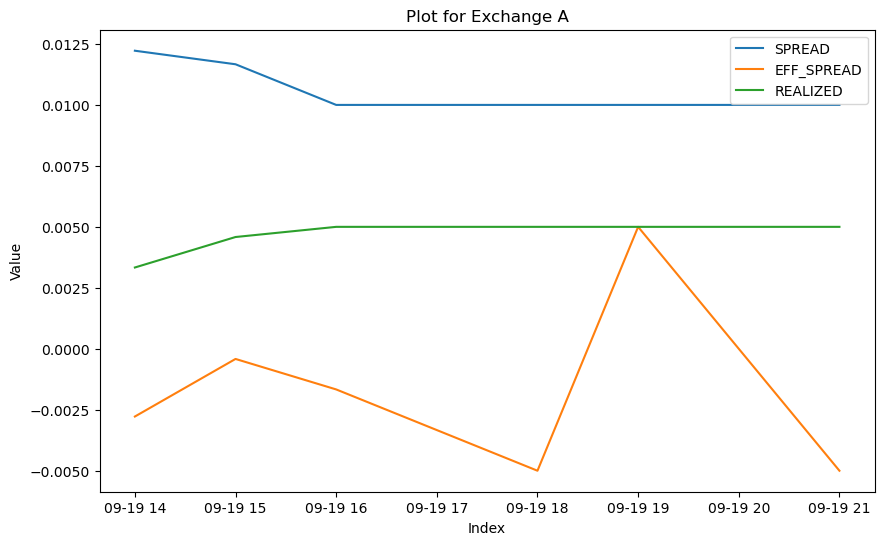

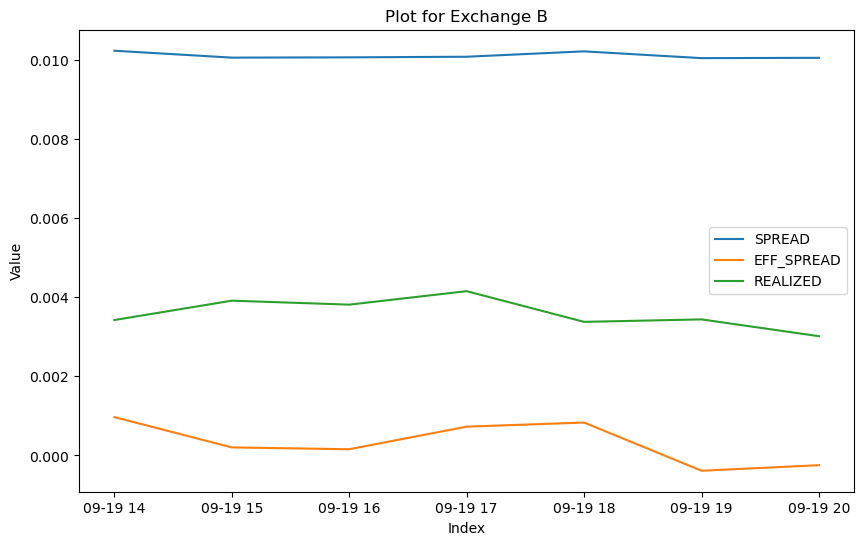

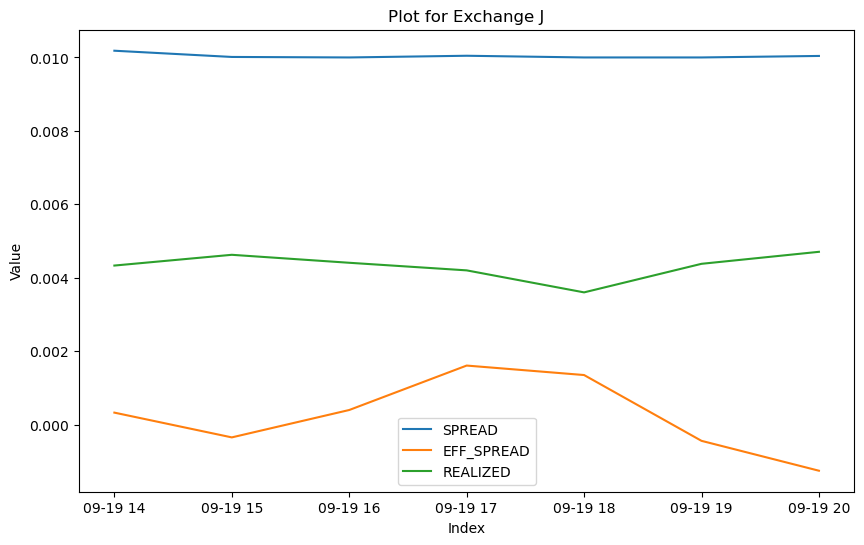

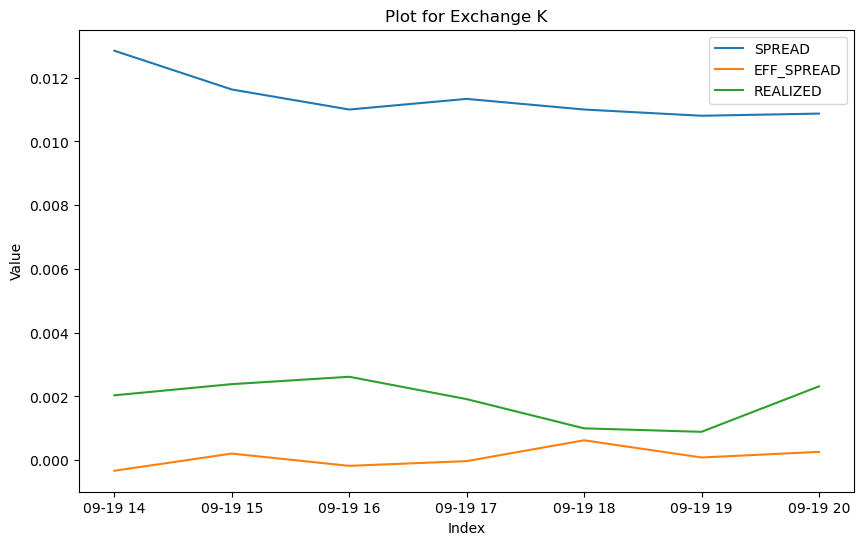

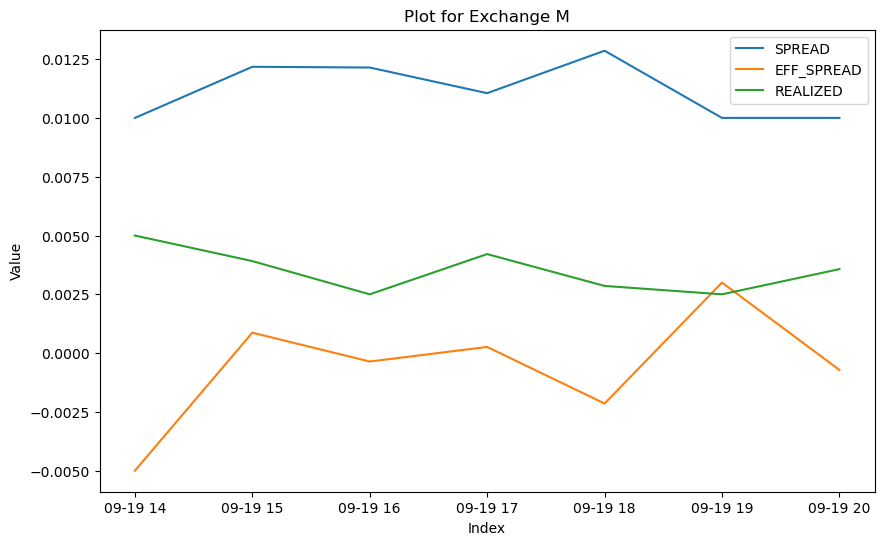

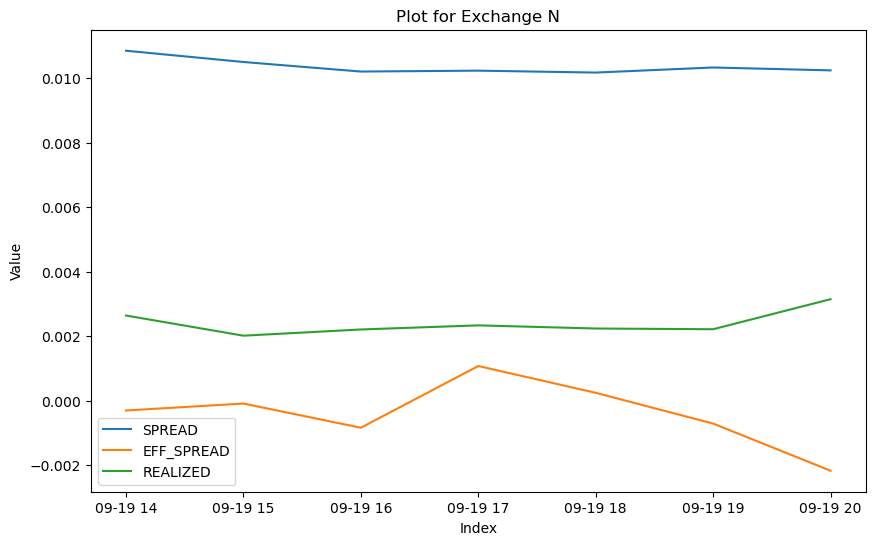

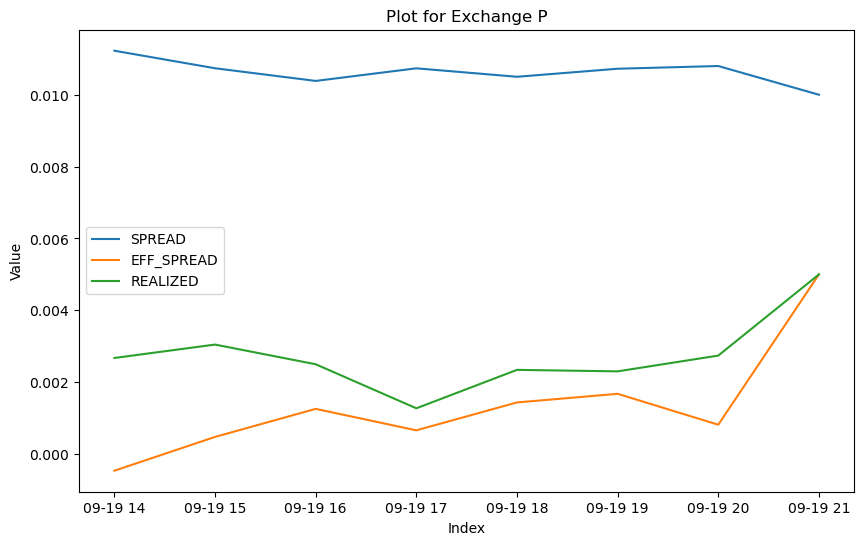

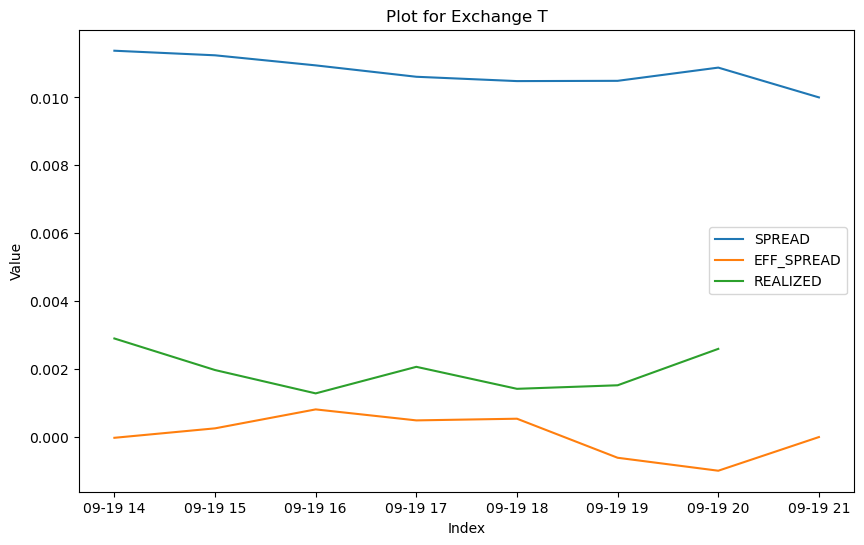

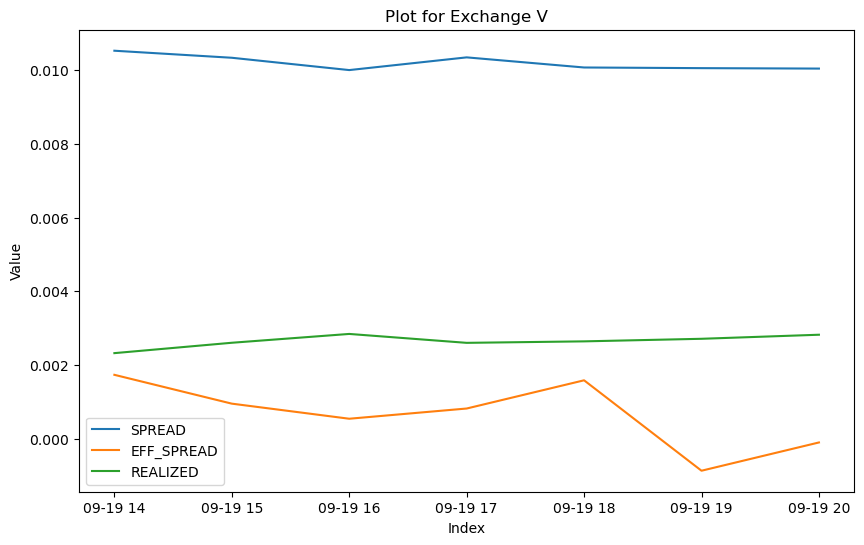

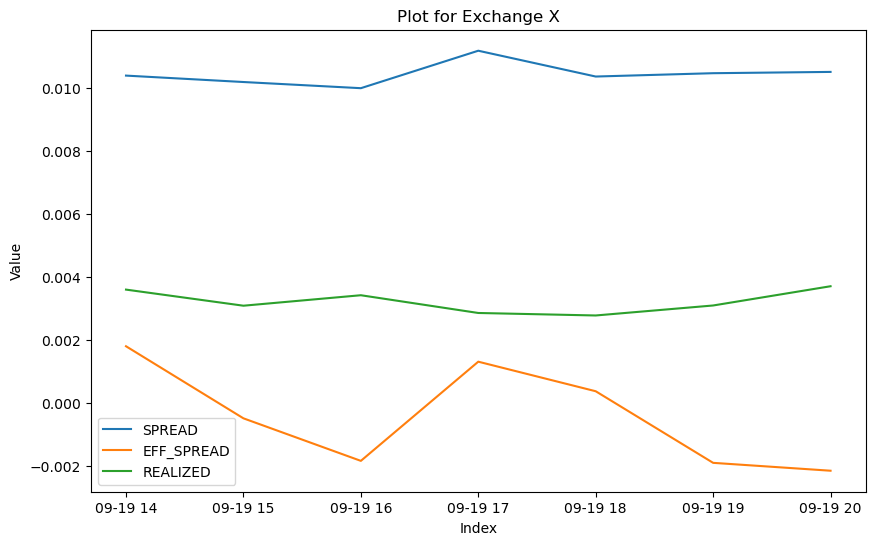

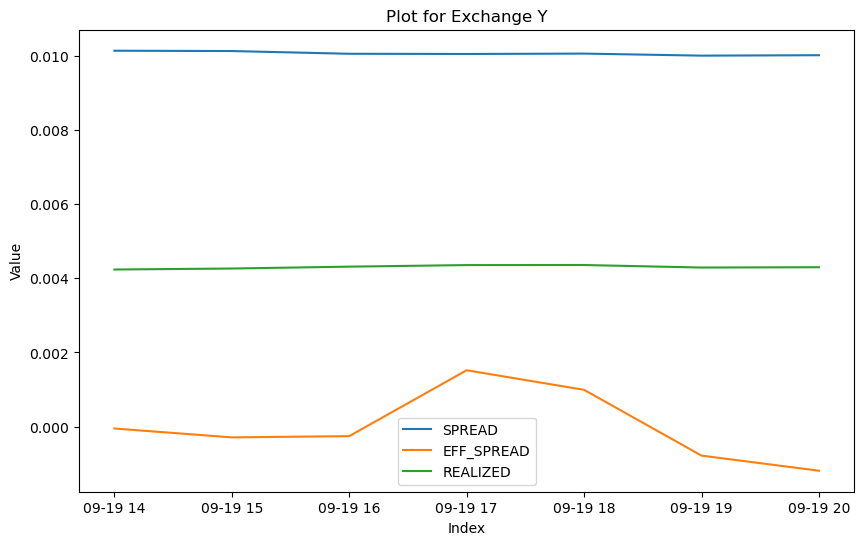

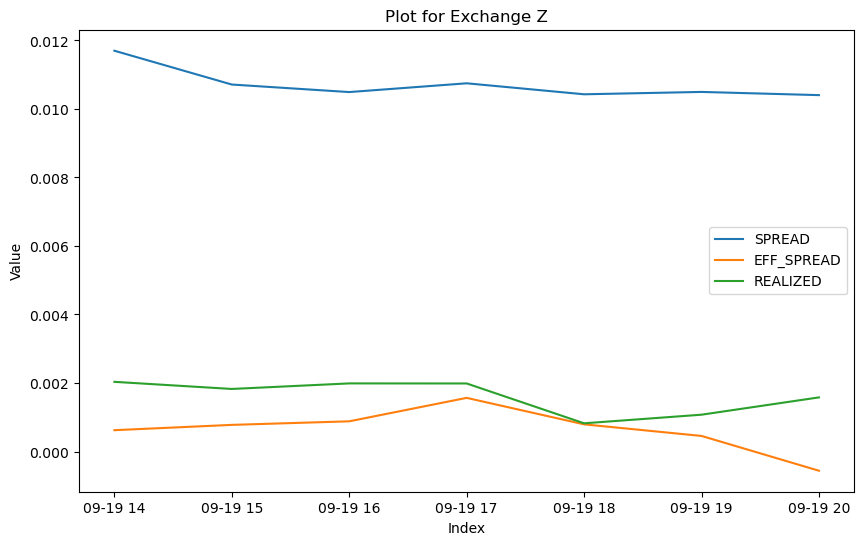

In [60]:
for name, group in exchangeTrades.items():
   hours = group['hour'].unique()
   spread = [group[group['hour'] == x]['SPREAD'].mean() for x in hours]
   eff = [group[group['hour'] == x]['EFF_SPREAD'].mean() for x in hours]
   realized = [group[group['hour'] == x]['REALIZED'].mean() for x in hours]
   # Plot SPREAD, EFF_SPREAD, REALIZED on same plot
   plt.figure(figsize=(10, 6))  

   plt.plot(hours, spread, label='SPREAD')
   plt.plot(hours, eff, label='EFF_SPREAD')
   plt.plot(hours, realized, label='REALIZED')

   plt.title(f'Plot for Exchange {name}')  
   plt.xlabel('Index')  
   plt.ylabel('Value')  
   plt.legend()  

   plt.show()


In [61]:
meanSpreads = {}
meanEffs = {}
meanRealizeds = {}

for name, group in exchangeTrades.items():
    meanSpread = group['SPREAD'].mean()
    meanEff = group['EFF_SPREAD'].mean()
    meanRealized = group['REALIZED'].mean()
    meanSpreads[name] = meanSpread
    meanEffs[name] = meanEff
    meanRealizeds[name] = meanRealized

print(meanSpreads)
print(meanEffs)
print(meanRealizeds)



{'A': 0.011111111111110874, 'B': 0.010079693034238599, 'J': 0.010038022813688164, 'K': 0.011431897555297069, 'M': 0.011481481481480952, 'N': 0.010382460676578336, 'P': 0.010774710596616164, 'T': 0.01098412698412701, 'V': 0.01018386108273746, 'X': 0.010425101214574881, 'Y': 0.010056030256338418, 'Z': 0.010716995447647893}
{'A': -0.0013888888888889414, 'B': 0.00018904958677673663, 'J': -0.000165874524714932, 'K': 6.402793946445605e-05, 'M': 0.0003086419753085367, 'N': -0.0007703081232493707, 'P': 0.0006656277827246691, 'T': 4.12698412697496e-05, 'V': 0.0006077630234930818, 'X': -0.00039473684210540756, 'Y': -0.00014827006583579834, 'Z': 0.0003812594840666367}
{'A': 0.004351851851851578, 'B': 0.0035004427390793345, 'J': 0.004438688212927611, 'K': 0.0020547147846335183, 'M': 0.003456790123456673, 'N': 0.002546541693600783, 'P': 0.0025801424755121393, 'T': 0.002156925031766618, 'V': 0.002669816138917489, 'X': 0.003309716599190452, 'Y': 0.004299971984871836, 'Z': 0.0016786798179063886}


#### Order Sign Correlation
1. autocorrelation plot of order sign 
2. re-produce the above figure in log term (both x-axis and y-axis are in log term)

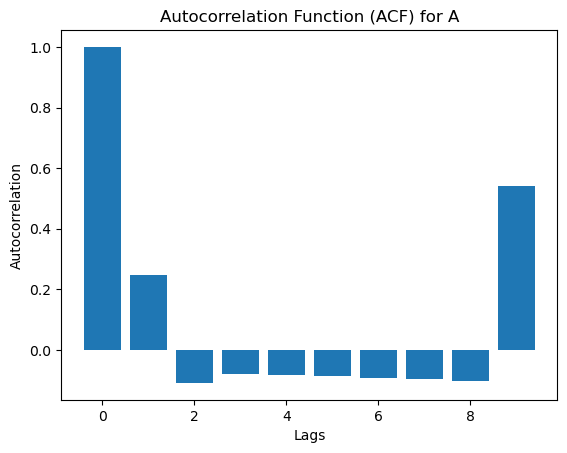

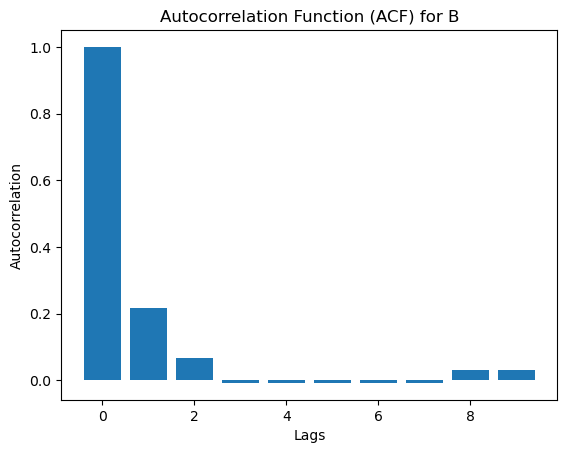

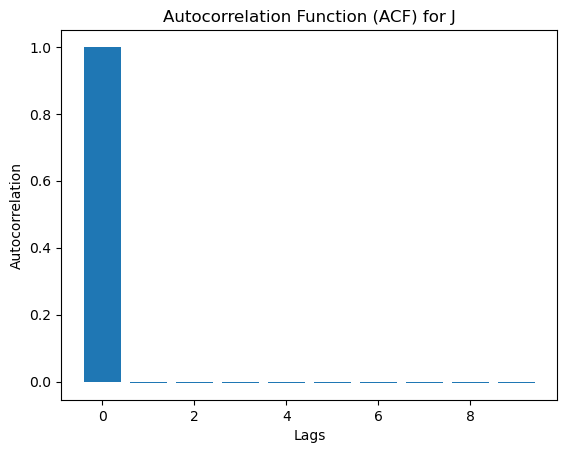

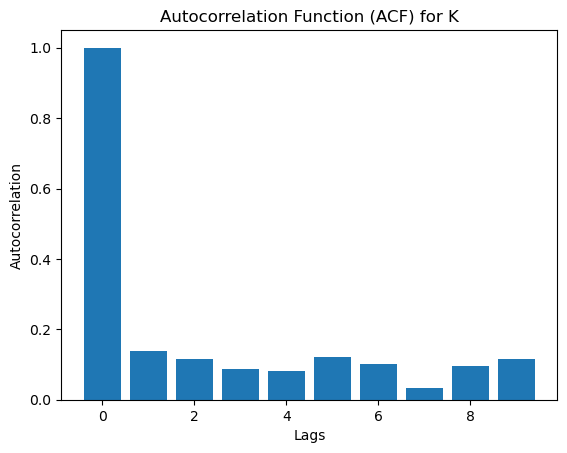

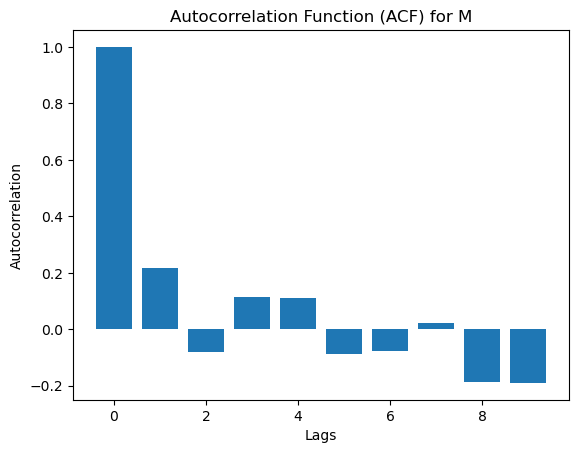

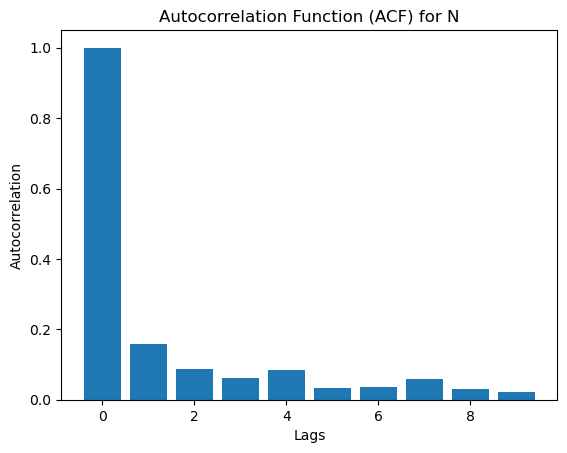

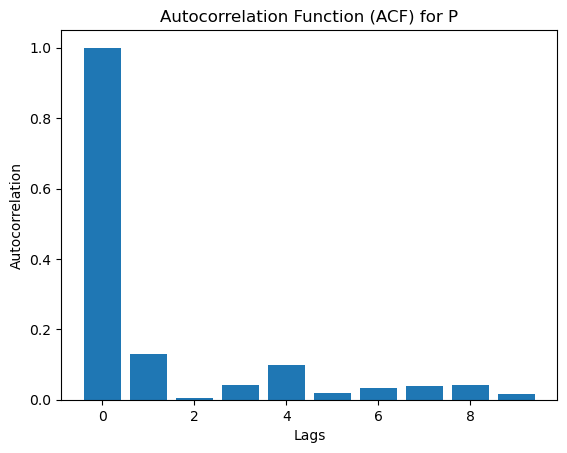

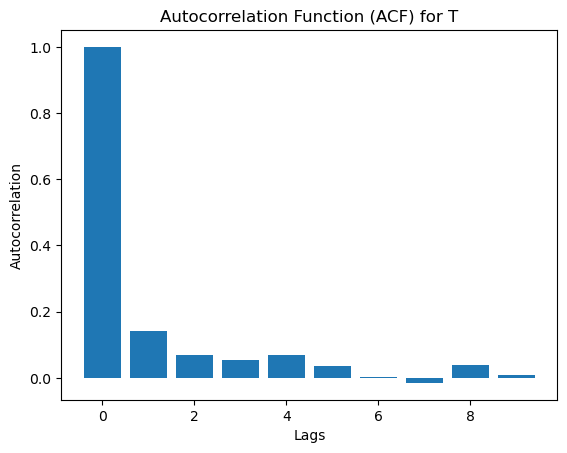

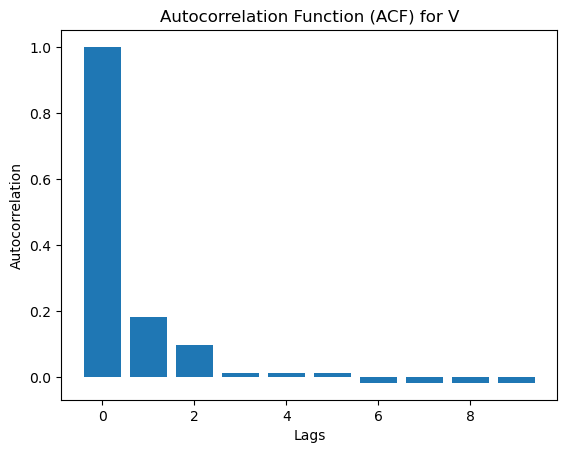

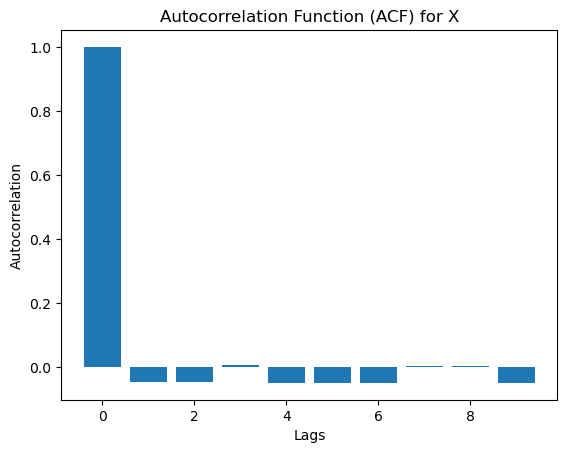

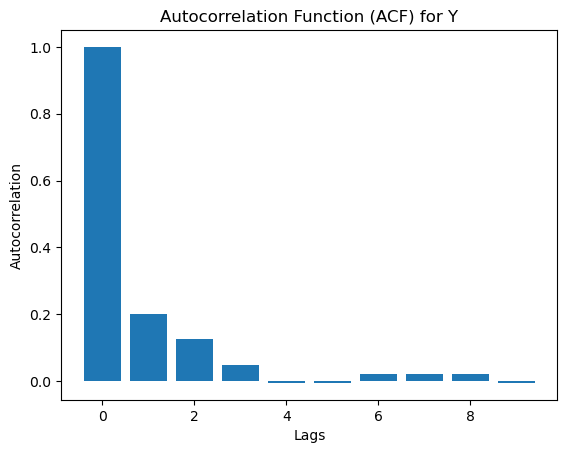

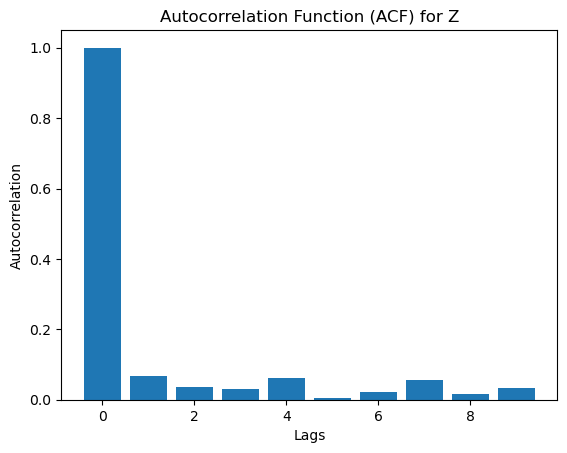

In [62]:
lags = 10

for name, group in exchangeTrades.items():
    acfs = []
    for i in range(lags):
        acf = group['SPREAD'].autocorr(lag=i)
        acfs.append(acf)
    
    plt.figure()
    plt.bar(range(lags), acfs)
    
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Function (ACF) for {name}')
    plt.show()


#### Question 3 Quote data
Data BAC_nbbo.csv is order bood data (only the best quotes), with each row one of the price or size at the best bid or ask changes which corresponds to change in the supply or demand. 
* Calculate order imbalance OFI (keep only Nasdaq exchanges)
* Aggregate OFI to second level (take summation)

##### Order Imbalance
Order flow imbalance represents the changes in supply and demand. 
* Best bid or size at the best bid increase -> increase in demand.
* Best bid or size at the best bid decreases -> decrease in demand.
* Best ask decreases or size at the best ask increases -> increase in supply.
* Best ask increases or size at the best ask decreases -> decrease in supply.

Mathematically we summarise these four effects at from time $n-1$ to $n$ as:
$$e_n = I_{B_n \geq B_{n-1}} q_n - I_{B_n \leq B_{n-1}} q_{n-1} - I_{A_n \leq A_{n-1}} q_n + I_{A_n \geq A_{n-1}} q_{n-1} $$
where $B_n$ is the beset Bid price at time $n$ and $q_n$ is the size at those prices 

In [63]:
quote = pd.read_csv('C:/Users/simon/Downloads/BAC_nbbo.csv')
def timeMParser(timestamp):
    timestamp_truncated = timestamp.split('.')[0]
    return timestamp_truncated
quote['TIME_M'] = quote['TIME_M'].apply(timeMParser)
quote.head()

C:\Users\simon\AppData\Local\Temp\ipykernel_20356\2939423797.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  quote = pd.read_csv('C:/Users/simon/Downloads/BAC_nbbo.csv')


,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,QU_COND,QU_SEQNUM,NATBBO_IND,QU_CANCEL,QU_SOURCE,SYM_ROOT,SYM_SUFFIX
0,20211231,3:59:00,Z,0.00,0,0.00,0,R,499,O,NaN,C,BAC,NaN
1,20211231,3:59:00,K,0.00,0,0.00,0,R,681,O,NaN,C,BAC,NaN
2,20211231,4:00:00,P,36.00,1,0.00,0,R,984,G,NaN,C,BAC,NaN
3,20211231,4:00:00,P,36.00,1,48.04,10,R,988,G,NaN,C,BAC,NaN
4,20211231,4:00:00,P,40.17,1,48.04,10,R,990,G,NaN,C,BAC,NaN


In [64]:
quote['BI1'] = np.where(quote['BID'] >= quote['BID'].shift(1), 1, 0)
quote['BI2'] = np.where(quote['BID'] <= quote['BID'].shift(1), 1, 0)    
quote['AI1'] = np.where(quote['ASK'] <= quote['ASK'].shift(1), 1, 0)
quote['AI2'] = np.where(quote['ASK'] >= quote['ASK'].shift(1), 1, 0)
quote['OFI'] = quote['BI1']*quote['BIDSIZ'] - quote['BI2']*quote['BIDSIZ'].shift(1) + quote['AI1']*quote['ASKSIZ'] - quote['AI2']*quote['ASKSIZ'].shift(1)

In [65]:
quote.head()

,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,QU_COND,QU_SEQNUM,NATBBO_IND,QU_CANCEL,QU_SOURCE,SYM_ROOT,SYM_SUFFIX,BI1,BI2,AI1,AI2,OFI
0,20211231,3:59:00,Z,0.00,0,0.00,0,R,499,O,NaN,C,BAC,NaN,0,0,0,0,NaN
1,20211231,3:59:00,K,0.00,0,0.00,0,R,681,O,NaN,C,BAC,NaN,1,1,1,1,0.0
2,20211231,4:00:00,P,36.00,1,0.00,0,R,984,G,NaN,C,BAC,NaN,1,0,1,1,1.0
3,20211231,4:00:00,P,36.00,1,48.04,10,R,988,G,NaN,C,BAC,NaN,1,1,0,1,0.0
4,20211231,4:00:00,P,40.17,1,48.04,10,R,990,G,NaN,C,BAC,NaN,1,0,1,1,1.0


In [66]:
# Creat second stamp

In [67]:
## only keep trading hours
def timeMtoHour(timestamp):
    date = dt.strptime(timestamp, "%H:%M:%S")
    hour = date.hour
    return hour
quote['HOUR'] = quote['TIME_M'].apply(timeMtoHour)



In [72]:
quote.head()

,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,QU_COND,QU_SEQNUM,NATBBO_IND,...,QU_SOURCE,SYM_ROOT,SYM_SUFFIX,BI1,BI2,AI1,AI2,OFI,HOUR,SPREAD
0,20211231,3:59:00,Z,0.00,0,0.00,0,R,499,O,...,C,BAC,NaN,0,0,0,0,NaN,3,0.00
1,20211231,3:59:00,K,0.00,0,0.00,0,R,681,O,...,C,BAC,NaN,1,1,1,1,0.0,3,0.00
3,20211231,4:00:00,P,36.00,1,48.04,10,R,988,G,...,C,BAC,NaN,1,1,0,1,0.0,4,12.04
4,20211231,4:00:00,P,40.17,1,48.04,10,R,990,G,...,C,BAC,NaN,1,0,1,1,1.0,4,7.87
5,20211231,4:00:00,P,40.17,1,44.78,1,R,991,G,...,C,BAC,NaN,1,1,1,0,1.0,4,4.61


In [97]:
# notice the extreme values in BID and ASK!! 
# need to clean data 
# first, remove negative spreads
# then outlier quotes
quote['SPREAD'] = quote['ASK'] - quote['BID']   
quote = quote[quote['SPREAD'] >= 0]

def remove_outliers(group):
    z_scores_weighted_bid = (group['BID'] * group['BIDSIZ'] - (group['BID'] * group['BIDSIZ']).mean()) / (group['BID'] * group['BIDSIZ']).std()
    z_scores_weighted_ask = (group['ASK'] * group['ASKSIZ'] - (group['ASK'] * group['ASKSIZ']).mean()) / (group['ASK'] * group['ASKSIZ'] ).std()
    return group[(z_scores_weighted_bid.abs() < 3) & (z_scores_weighted_ask.abs() < 3)]

quote_filtered = quote.groupby(['DATE', 'HOUR']).apply(remove_outliers)
quote_filtered.drop(columns=['DATE', 'TIME_M', 'HOUR'], inplace=True)
quote = quote.merge(quote_filtered, how='right')
quote.head(50)


,level_0,index,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,QU_COND,...,QU_SOURCE,SYM_ROOT,SYM_SUFFIX,BI1,BI2,AI1,AI2,OFI,HOUR,SPREAD
0,4,5,20211231,4:00:00,P,40.17,1,44.78,1,R,...,C,BAC,NaN,1,1,1,0,1.0,4,4.61
1,5,6,20211231,4:00:00,P,43.00,1,44.78,1,R,...,C,BAC,NaN,1,0,1,1,1.0,4,1.78
2,6,7,20211231,4:00:00,P,43.00,2,44.78,1,R,...,C,BAC,NaN,1,1,1,1,1.0,4,1.78
3,7,10,20211231,4:00:00,K,41.33,2,48.41,1,R,...,C,BAC,NaN,1,1,0,1,0.0,4,7.08
4,8,11,20211231,4:00:00,K,42.55,1,45.29,1,R,...,C,BAC,NaN,1,0,1,0,2.0,4,2.74
5,9,12,20211231,4:00:00,K,42.55,1,45.29,1,R,...,C,BAC,NaN,1,1,1,1,0.0,4,2.74
6,11,14,20211231,4:00:00,K,42.55,1,45.00,1,R,...,C,BAC,NaN,1,1,1,0,1.0,4,2.45
7,12,15,20211231,4:00:00,K,42.55,1,45.00,1,R,...,C,BAC,NaN,1,1,1,1,0.0,4,2.45
8,13,16,20211231,4:00:00,K,42.55,1,45.00,1,R,...,C,BAC,NaN,1,1,1,1,0.0,4,2.45
9,14,17,20211231,4:00:00,K,42.55,1,45.00,1,R,...,C,BAC,NaN,1,1,1,1,0.0,4,2.45


In [98]:
# quote_filtered = quote.groupby(['DATE', 'HOUR']).apply(remove_outliers)
# quote_filtered.head()

# Aggregate by second 
# Construct return as log difference of last mid price and first mid price of each second 
def timeMtoSecond(timestamp):
    date = dt.strptime(timestamp, "%H:%M:%S")
    second = date.second
    return second

quote_filtered_second = quote.groupby(['DATE', 'TIME_M'])
quote_filtered_second.head()


,level_0,index,DATE,TIME_M,EX,BID,BIDSIZ,ASK,ASKSIZ,QU_COND,...,QU_SOURCE,SYM_ROOT,SYM_SUFFIX,BI1,BI2,AI1,AI2,OFI,HOUR,SPREAD
0,4,5,20211231,4:00:00,P,40.17,1,44.78,1,R,...,C,BAC,NaN,1,1,1,0,1.0,4,4.61
1,5,6,20211231,4:00:00,P,43.00,1,44.78,1,R,...,C,BAC,NaN,1,0,1,1,1.0,4,1.78
2,6,7,20211231,4:00:00,P,43.00,2,44.78,1,R,...,C,BAC,NaN,1,1,1,1,1.0,4,1.78
3,7,10,20211231,4:00:00,K,41.33,2,48.41,1,R,...,C,BAC,NaN,1,1,0,1,0.0,4,7.08
4,8,11,20211231,4:00:00,K,42.55,1,45.29,1,R,...,C,BAC,NaN,1,0,1,0,2.0,4,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875351,2301701,2302030,20211231,20:00:00,K,0.00,0,0.00,0,R,...,C,BAC,NaN,0,1,1,0,-3.0,20,0.00
1875352,2301703,2302032,20211231,20:00:00,T,0.00,0,0.00,0,R,...,C,BAC,NaN,1,1,1,0,0.0,20,0.00
1875353,2303694,2304097,20211231,20:00:00,K,0.00,0,0.00,0,R,...,C,BAC,PRB,1,1,1,0,0.0,20,0.00
1875354,2304423,2304849,20211231,20:00:00,K,0.00,0,0.00,0,R,...,C,BAC,PRE,1,1,1,1,0.0,20,0.00


Using OFI to generate trading signal: first do train/test split by selecting the first 70% of the data

In [ ]:
# Test whether OFI can explain return variations in train data

In [ ]:
# explainatry power for test sample 

##### Construct a Predictive Trading Signal
BUT! The above analysis is in-sample. We want to see out-sample results. 

In [ ]:
# calculate one-second ahead return 

In [ ]:
# Test whether OFI can explain FUTURE return variations
# Split sample to test and train samples again 
# Test whether lagged OFI can predict FUTURE return


In [ ]:
# explainatry power for test sample


In [ ]:
# plots cummulative return of the strategy using signal from past OFI 